# Overview of Ford GoBike System

## Investigation Overview

In this investigation, I wanted to overview the Ford GoBike System through exploratory analysis. The main focus was to answer where were bikes / their stations? What is the clientele profile and how often are they using the bikes?

## Dataset Overview

The April 2019 dataset was used to reflect the most up-to-date information. The data consisted of 239111 bike ride records. The attributes included trip duration, station locations, station names, bikeids, and attributes of riders such as user type and gender. Anomalous data points (zeros) were removed and NaN values were dropped for impacted visualizations. 

## Summary of Findings
In my analysis I found that the bike stations are in Northern California (San Jose area). Not only was I interested in the station locations, I looked into the number of bikes and found 4520 unique bikes. 

Then I wanted to explore who was using the bikes. The user types are subscribers and customers, and more trips are taken by subscribers than by customers. (203196 by subscribers, 35914 by customers). The users are also classified by gender. More trips are taken by men than by women and other. (55498 by females, 168139 males, and 4274 by other).

Based on the clientele information, I wanted to know how long the rides were and what were the factors that attributed to trip duration. One-time customers take longer trips than regular subscribers. (Customers median trip is 879 sec, subscribers median trip is 521 sec). Females trips are longer than male or other trips. Female median is 623 sec, male median is 532 sec, and other median is 586). I also created a correlation matrix to understand how each of the continuous variables relate to trip duration, but found that few of them had strong correlation coefficients.

## Key Insights
In my presentation I focused on bike station locations, user demographics, and user trip durations. One main insight was that the bike stations are in the bay area in an interesting triangular shape. 

Another insight is that more trips are taken by subscribers than by customers, which makes sense because a subscriber probably has a deal that incentivizes use. More trips are taken by men than my women. 

The last insight is on trip duration. Customer trips are longer than subscriber trips which is possible because customers may want to enjoy the rare experience since they do not ride as often. Female trips are longer than male trips. Maybe women do not pedal as quickly as men do, but who knows as it is 2019. ;)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('../201904-fordgobike-tripdata.csv')

## Bike Station Locations

The bikes stations are located in Northern California (Bay Area). Included are two views - a zoomed out and a zoomed in view of the stations. 

In [3]:
#find lat / long extremities given a dataframe
def geoBound(df,lat_name,lon_name):
    lonmax = df[lon_name].max()
    lonmin = df[lon_name].min()
    latmax = df[lat_name].max()
    latmin = df[lat_name].min()
    return lonmax,lonmin,latmax,latmin

In [4]:
#wrangling
df = df.drop([40680]) #drop zero
bounds = geoBound (df,'start_station_latitude','start_station_longitude') #get boundaries

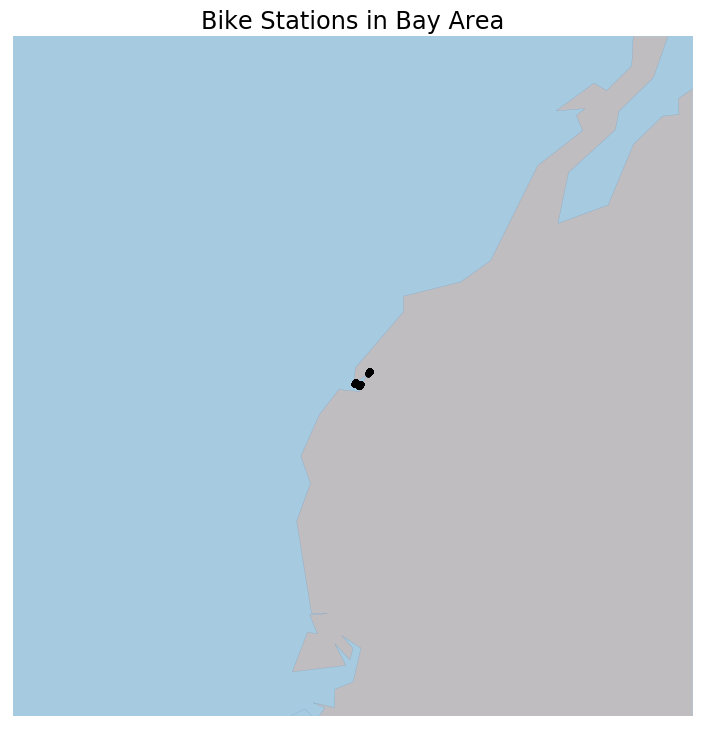

In [5]:
# map of station - view of san francisco area
my_dpi=96
plt.figure(figsize=(1300/my_dpi, 900/my_dpi), dpi=my_dpi)

# Make the background map
#m=Basemap(llcrnrlon=bounds[1], llcrnrlat=bounds[3],urcrnrlon=bounds[0],urcrnrlat=bounds[2])
m=Basemap(llcrnrlon=-135, llcrnrlat=50,urcrnrlon=-110,urcrnrlat=25)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='#ffa07a', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="steelblue")
m.drawstates(color='white')

# Add a point per position
m.scatter(df['start_station_longitude'], df['start_station_latitude'], s=10, alpha=0.5, c = 'black',zorder=2)
plt.title('Bike Stations in Bay Area',fontsize=18)
plt.show()

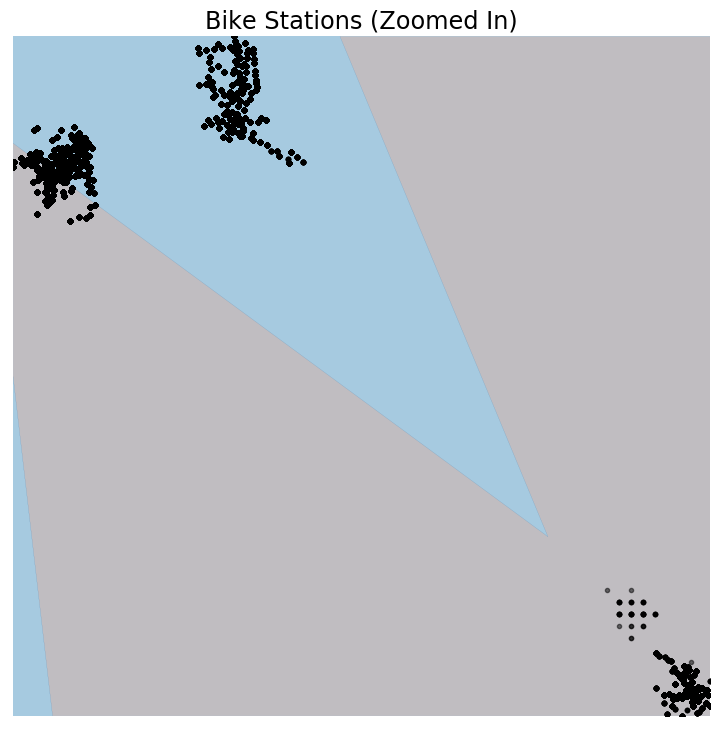

In [6]:
# zoom in view of start stations
my_dpi=96
plt.figure(figsize=(1300/my_dpi, 900/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=bounds[1], llcrnrlat=bounds[3],urcrnrlon=bounds[0],urcrnrlat=bounds[2])
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='#ffa07a', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="steelblue")
m.drawstates(color='white')

# Add a point per position
m.scatter(df['start_station_longitude'], df['start_station_latitude'], s=10, alpha=0.5, c = 'black',zorder=2)
plt.title('Bike Stations (Zoomed In)',fontsize=18)
plt.show()

## User Demographics

Males and Subscribers are the majority in the bike ride observations. More trips are taken by men than by women and other. (55498 by females, 168139 males, and 4274 by other). More trips are taken by subscribers than by customers. (203196 by subscribers, 35914 by customers)

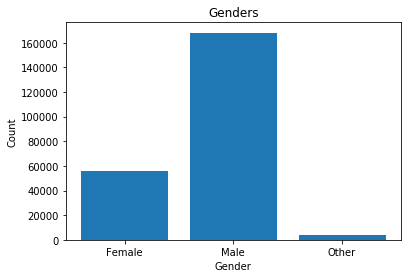

In [7]:
#barplot of user types (ie no of female vs male vs other for all observations)
genders = df.groupby('member_gender')[['member_gender']].size().values
index = ('Female','Male','Other')
y_pos = np.arange(len(index))
plt.bar(y_pos, genders)
plt.xticks(y_pos, index)
plt.title('Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

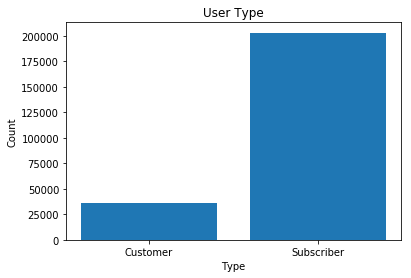

In [8]:
#barplot of user types (ie no of customers vs subscribers for all observations)
users = df.groupby('user_type')[['user_type']].size().values
index = ('Customer','Subscriber')
y_pos = np.arange(len(index))
plt.bar(y_pos, users)
plt.xticks(y_pos, index)
plt.title('User Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Factors Associated with Trip Duration

Customers and females have longer trip durations. One-time customers take longer trips than regular subscribers. (Customers median trip is 879 sec, subscribers median trip is 521 sec). Females trips are longer than male or other trips. (Female median is 623 sec, male median is 532 sec, and other median is 586)

In [9]:
#ride durations for customers, subscribers separately
customers = df[df['user_type']=='Customer'][['duration_sec']].values
subscribers = df[df['user_type']=='Subscriber'][['duration_sec']].values
data_to_plot = [customers, subscribers]

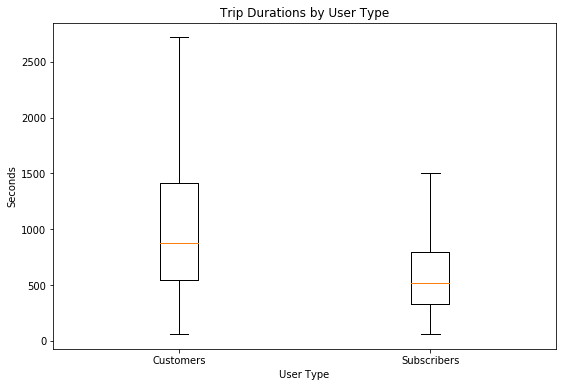

In [10]:
#create box plots to compare trip durations between customers and subscribers
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,showfliers=False)
ax.set_xticklabels(['Customers', 'Subscribers'])
plt.title('Trip Durations by User Type')
plt.xlabel('User Type')
plt.ylabel('Seconds');

In [11]:
#trip durations for females, males, and other separately
female = df[df['member_gender']=='Female'][['duration_sec']].values
male = df[df['member_gender']=='Male'][['duration_sec']].values
other = df[df['member_gender']=='Other'][['duration_sec']].values
data_to_plot = [female, male, other]

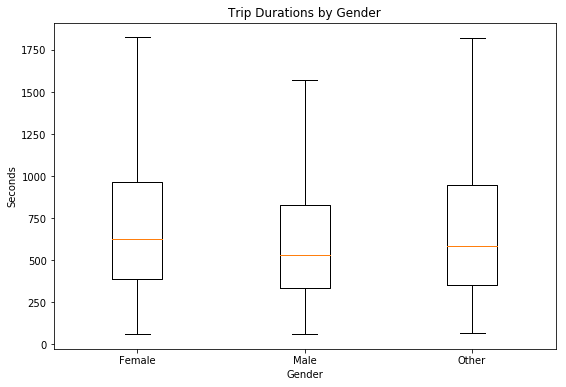

In [12]:
#create box plots to compare trip durations by gender
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,showfliers=False)
ax.set_xticklabels(['Female', 'Male','Other'])
plt.title('Trip Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Seconds');